In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dataset/all_cars_datset_final.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/car-dataset/all_cars_datset_final.csv')

In [4]:
data.head()

,Brand,Car Name,Price,Rating,Safety,Mileage,Power (BHP),FY2024(sales)
0,Maruti Suzuki,Maruti Brezza,Rs. 8.69 Lakh,4.5/5,4 Star Safety,17-25 kmpl,87-102 bhp,"1,69,897"
1,Maruti Suzuki,Maruti Fronx,Rs. 7.54 Lakh,4.6/5,3 Star Safety,20-28 kmpl,76-99 bhp,"1,34,735"
2,Maruti Suzuki,Maruti Swift,Rs. 6.49 Lakh,4.6/5,2 Star Safety,24-32 kmpl,69-80 bhp,"1,95,321"
3,Maruti Suzuki,Maruti Dzire,Rs. 6.84 Lakh,4.7/5,5 Star Safety,24-33 kmpl,69-80 bhp,"1,64,517"
4,Maruti Suzuki,Maruti Baleno,Rs. 6.70 Lakh,4.5/5,4 Star Safety,22-30 kmpl,76-88 bhp,"1,95,607"


In [5]:
data.shape

(248, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          248 non-null    object
 1   Car Name       248 non-null    object
 2   Price          248 non-null    object
 3   Rating         242 non-null    object
 4   Safety         199 non-null    object
 5   Mileage        129 non-null    object
 6   Power (BHP)    209 non-null    object
 7   FY2024(sales)  112 non-null    object
dtypes: object(8)
memory usage: 15.6+ KB


<Axes: >

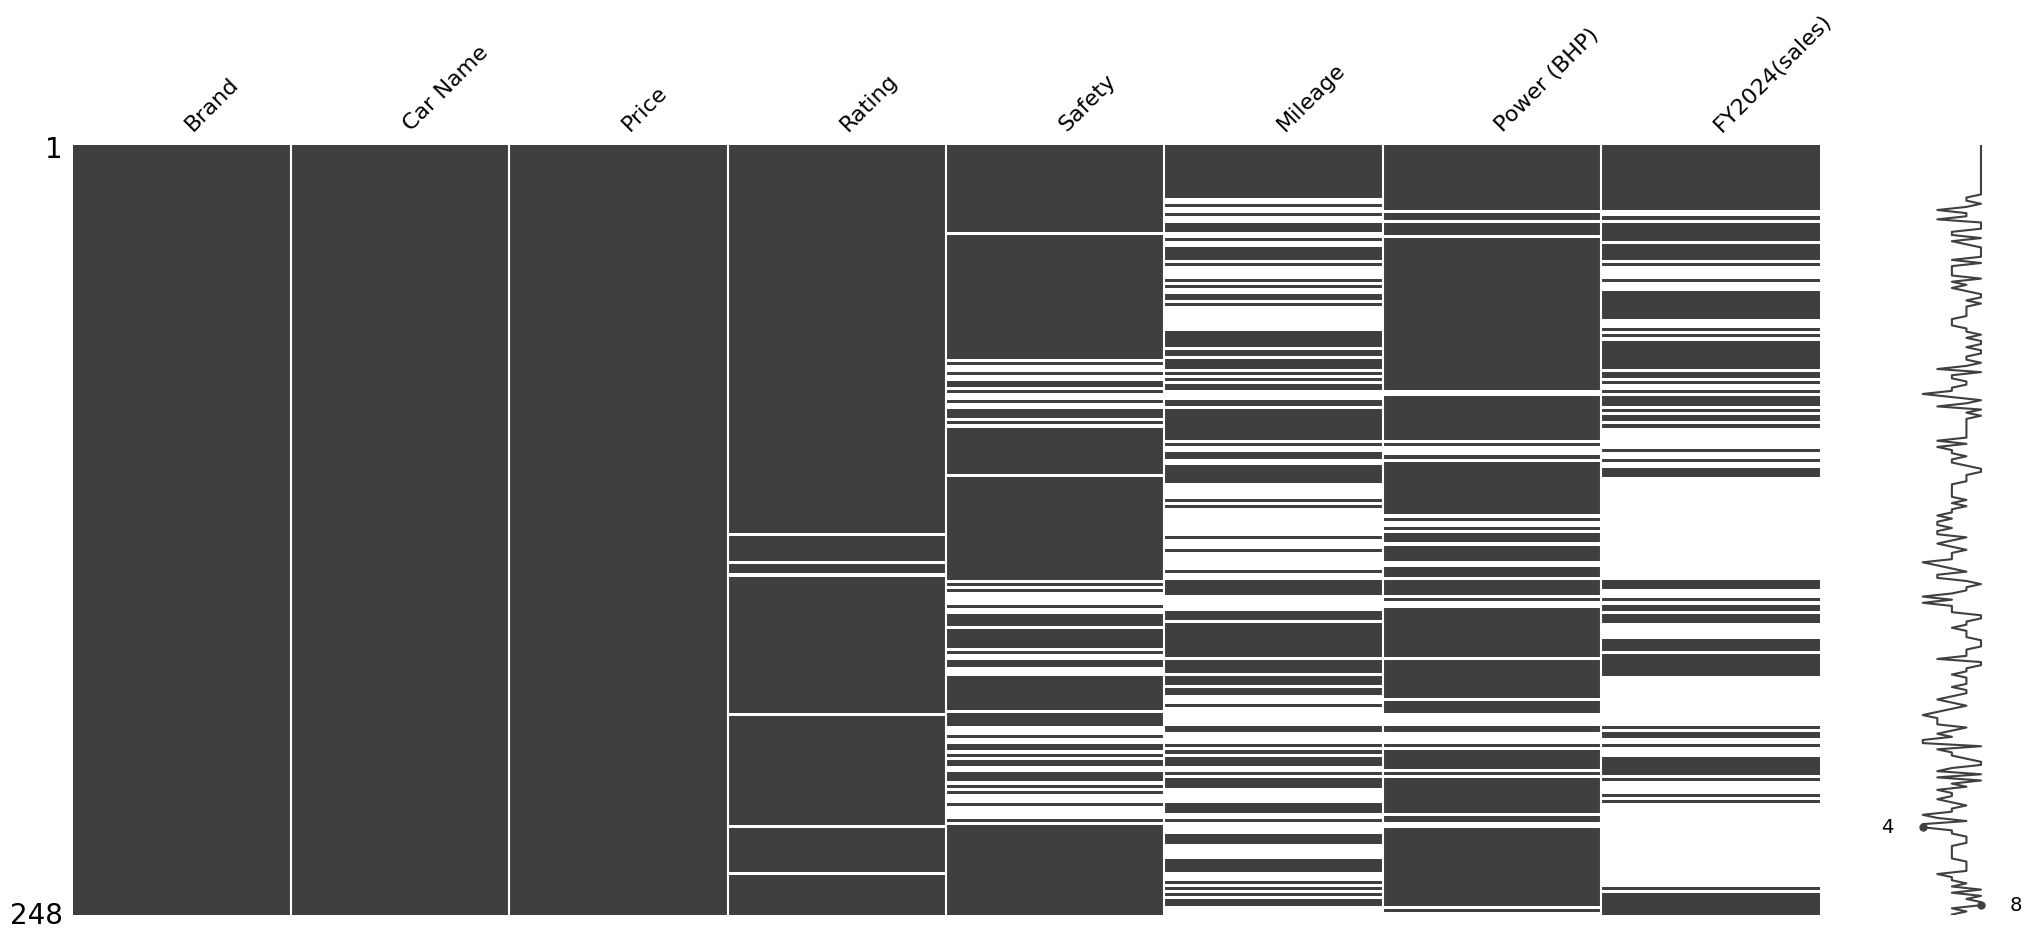

In [7]:
#Visualizing the missing values
import missingno as msno
msno.matrix(data)

In [8]:
data.isnull().mean()*100

Brand             0.000000
Car Name          0.000000
Price             0.000000
Rating            2.419355
Safety           19.758065
Mileage          47.983871
Power (BHP)      15.725806
FY2024(sales)    54.838710
dtype: float64

In [9]:
#Converting the dtype from object to numeric
def extractcol(col):
       return pd.to_numeric(col.str.extract(r'(\d+\.\d+|\d+)')[0],errors='coerce')

data['Price'] = extractcol(data['Price'])
data['Safety'] = extractcol(data['Safety'])

In [10]:
data['Price'] = data['Price'].astype(float)*100000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          248 non-null    object 
 1   Car Name       248 non-null    object 
 2   Price          248 non-null    float64
 3   Rating         242 non-null    object 
 4   Safety         199 non-null    float64
 5   Mileage        129 non-null    object 
 6   Power (BHP)    209 non-null    object 
 7   FY2024(sales)  112 non-null    object 
dtypes: float64(2), object(6)
memory usage: 15.6+ KB


In [12]:
data['Rating'] = extractcol(data['Rating'])

In [13]:
def extract_mileage(data):
    if pd.isnull(data):
        return None
    mileage = [float(i) for i in data.replace('kmpl','').replace('kmph','').split('-')]
    return sum(mileage) / len(mileage) if len(mileage)==2 else mileage[0] 
    
data['Mileage'] = data['Mileage'].apply(extract_mileage)

In [14]:
data['Mileage'].head()

0    21.0
1    24.0
2    28.0
3    28.5
4    26.0
Name: Mileage, dtype: float64

In [15]:
def extract_power(data):
    if pd.isnull(data):
        return None
    power = [float(i) for i in data.replace('bhp','').split('-')]
    return sum(power) / len(power) if len(power) == 2 else power[0]

data['Power (BHP)'] = data['Power (BHP)'].apply(extract_power)

In [16]:
data['Power (BHP)'].head()

0    94.5
1    87.5
2    74.5
3    74.5
4    82.0
Name: Power (BHP), dtype: float64

In [17]:
def extract_fy(data):
    if pd.isnull(data):
        return None
    fy = float(data.replace(',',''))
    return fy

data['FY2024(sales)'] = data['FY2024(sales)'].apply(extract_fy)

In [18]:
data['FY2024(sales)'].head()

0    169897.0
1    134735.0
2    195321.0
3    164517.0
4    195607.0
Name: FY2024(sales), dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          248 non-null    object 
 1   Car Name       248 non-null    object 
 2   Price          248 non-null    float64
 3   Rating         242 non-null    float64
 4   Safety         199 non-null    float64
 5   Mileage        129 non-null    float64
 6   Power (BHP)    209 non-null    float64
 7   FY2024(sales)  112 non-null    float64
dtypes: float64(6), object(2)
memory usage: 15.6+ KB


In [20]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data['Safety'] = data['Safety'].fillna(data['Safety'].median())
data['Power (BHP)'] = data['Power (BHP)'].fillna(data['Power (BHP)'].median())

In [21]:
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          248 non-null    object 
 1   Car Name       248 non-null    object 
 2   Price          248 non-null    float64
 3   Rating         248 non-null    float64
 4   Safety         248 non-null    float64
 5   Mileage        248 non-null    float64
 6   Power (BHP)    248 non-null    float64
 7   FY2024(sales)  112 non-null    float64
dtypes: float64(6), object(2)
memory usage: 15.6+ KB


In [23]:
data= data.drop(columns='FY2024(sales)')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        248 non-null    object 
 1   Car Name     248 non-null    object 
 2   Price        248 non-null    float64
 3   Rating       248 non-null    float64
 4   Safety       248 non-null    float64
 5   Mileage      248 non-null    float64
 6   Power (BHP)  248 non-null    float64
dtypes: float64(5), object(2)
memory usage: 13.7+ KB


In [25]:
print(data['Brand'].nunique())

33


In [26]:
print(data['Car Name'].nunique())

248


In [27]:
data = pd.get_dummies(data, columns=['Brand'], prefix='Brand', dtype=int)

car_name_freq = data['Car Name'].value_counts().to_dict()
data['Car Name Encoded'] = data['Car Name'].map(car_name_freq)

data = data.drop(columns='Car Name')

In [28]:
data.head()

,Price,Rating,Safety,Mileage,Power (BHP),Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_BYD,Brand_Bentley,...,Brand_Mercedes-Benz,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Rolls-Royce,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volvo,Car Name Encoded
0,869000.0,4.5,4.0,21.0,94.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,754000.0,4.6,3.0,24.0,87.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,649000.0,4.6,2.0,28.0,74.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,684000.0,4.7,5.0,28.5,74.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,670000.0,4.5,4.0,26.0,82.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data.shape

(248, 39)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                248 non-null    float64
 1   Rating               248 non-null    float64
 2   Safety               248 non-null    float64
 3   Mileage              248 non-null    float64
 4   Power (BHP)          248 non-null    float64
 5   Brand_Aston Martin   248 non-null    int64  
 6   Brand_Audi           248 non-null    int64  
 7   Brand_BMW            248 non-null    int64  
 8   Brand_BYD            248 non-null    int64  
 9   Brand_Bentley        248 non-null    int64  
 10  Brand_Citroen        248 non-null    int64  
 11  Brand_Ferrari        248 non-null    int64  
 12  Brand_Force Motors   248 non-null    int64  
 13  Brand_Honda          248 non-null    int64  
 14  Brand_Hyundai        248 non-null    int64  
 15  Brand_Isuzu          248 non-null    int

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


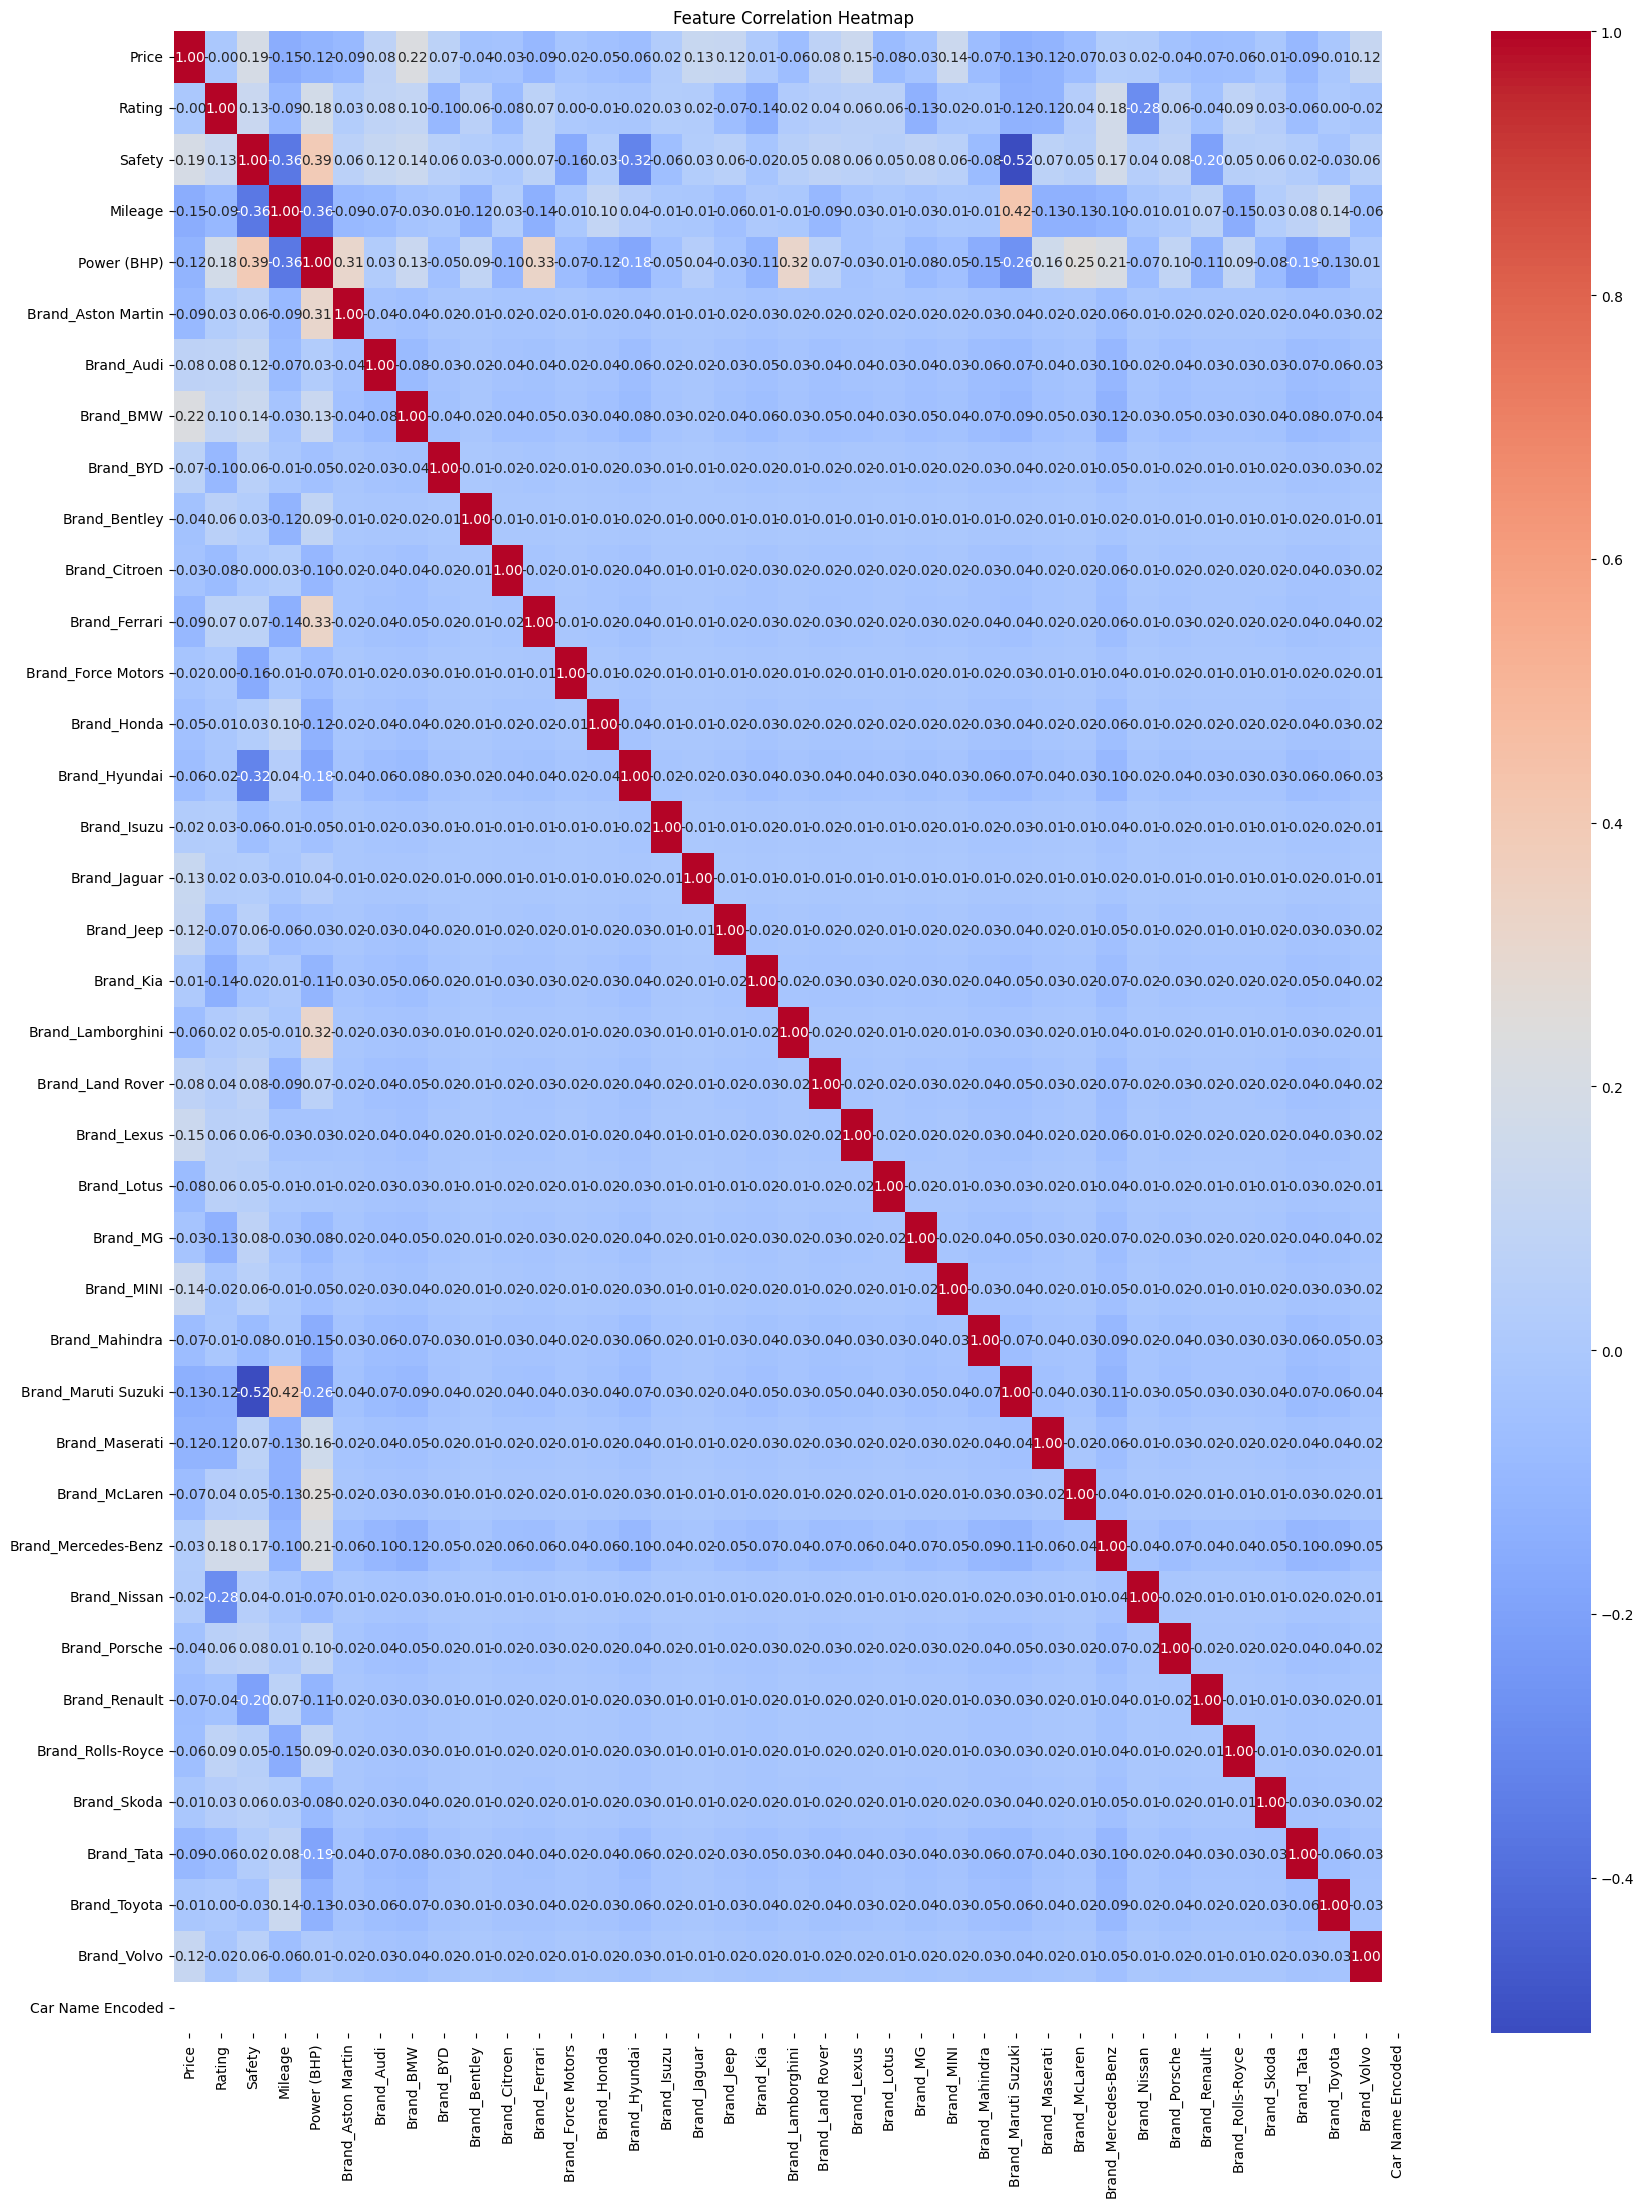

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()